In [30]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.api import qqplot
import statsmodels.formula.api as smf
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score,roc_curve,auc
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

matplotlib.rc("font",family = "NanumBarunGothic")
# 음수 표시
matplotlib.rc("axes",unicode_minus=False)

# 1. decribe -> 0 이하 값 확인
# 2. isna
# 3. box plot
# 4. histogram
# 5. 산점도

#### 데이터 불러오기

In [31]:
# 데이터 불러오기
df_oxi = pd.read_csv("/home/piai/바탕화면/B3_반도체/01 Oxidation.csv",encoding='euc-kr', index_col = 0)
df_soft = pd.read_csv("/home/piai/바탕화면/B3_반도체/02 Photo_softbake.csv",encoding='euc-kr', index_col = 0)
df_litho = pd.read_csv("/home/piai/바탕화면/B3_반도체/03 Photo_lithograpy.csv",encoding='euc-kr', index_col = 0)
df_etch = pd.read_csv("/home/piai/바탕화면/B3_반도체/04 Etching.csv",encoding='euc-kr', index_col = 0)
df_ion = pd.read_csv("/home/piai/바탕화면/B3_반도체/05 Ion_Implantation.csv",encoding='euc-kr', index_col = 0)
df_ins = pd.read_csv("/home/piai/바탕화면/B3_반도체/06 Inspect.csv",encoding='euc-kr', index_col = 0)

df_name = [df_oxi, df_soft, df_litho, df_etch, df_ion, df_ins]

#### 데이터 형태(행,열) 확인

In [32]:
for d in df_name:
    print(d.shape)

(1704, 13)
(1704, 18)
(1704, 10)
(1704, 13)
(1704, 15)
(1718, 7)


#### 데이터 병합

In [33]:
df = pd.merge(df_oxi, df_soft, on = ['No_Die', 'Lot_Num','Wafer_Num', 'Datetime'], how = 'inner')
df = pd.merge(df, df_litho, on = ['No_Die', 'Lot_Num','Wafer_Num', 'Datetime'], how = 'inner')
df = pd.merge(df, df_etch, on =  ['No_Die', 'Lot_Num','Wafer_Num', 'Datetime'], how = 'inner')
df = pd.merge(df, df_ion, on =  ['No_Die', 'Lot_Num','Wafer_Num', 'Datetime'], how = 'inner')
df = pd.merge(df, df_ins, on =  ['No_Die', 'Lot_Num','Wafer_Num', 'Datetime'], how = 'inner')

In [34]:
pd.set_option('display.max_columns', None) 
df

,No_Die,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,Lot_Num,Wafer_Num,Datetime,photo_soft_Chamber,process 2,resist_target,N2_HMDS,pressure_HMDS,temp_HMDS,temp_HMDS_bake,time_HMDS_bake,spin1,spin2,spin3,photoresist_bake,temp_softbake,time_softbake,lithography_Chamber,Process 2-1,Line_CD,UV_type,Wavelength,Resolution,Energy_Exposure,Etching_Chamber,Process 3,Thin F4,Thin F3,Thin F2,Thin F1,Temp_Etching,Source_Power,Selectivity,Chamber_Num,process4,Flux60s,Flux90s,Flux160s,Flux480s,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Target,Error_message,Wafer_map
0,NOLSM325131325,2,Oxidation,dry,1214.307948,O2,26.69,0.203,120,713.132,13,28,01-03-2022,1,Photo,1.46994,17.367,15.006,20.001,200.551,90.001,502.391,4017.144,4903.611,5.020,91.918,30.005,1,photo_li,41.676,I,365,505.388,109.628,1,Etching,340.0,1522.0,3644.0,5732.0,72.651,52.103,1.030,1,Implantation,1.500000e+16,1.320000e+17,6.470000e+17,3.010000e+17,6.000000e+17,30795.934,103.433,854.0,154,141.0,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...
1,NOLSM326132326,2,Oxidation,dry,978.110792,O2,30.86,0.217,137,714.295,13,29,01-03-2022,1,Photo,0.86579,16.090,15.059,19.993,199.835,89.999,507.183,4072.913,4979.082,4.937,90.976,30.005,1,photo_li,53.612,H,405,541.732,104.917,2,Etching,265.0,1513.0,3631.0,5729.0,70.267,52.004,1.038,2,Implantation,1.110000e+16,4.370000e+16,1.040000e+18,3.030000e+17,6.000000e+17,32135.618,105.552,895.0,156,55.0,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...
2,NOLSM327133327,2,Oxidation,dry,1176.019149,O2,31.07,0.218,116,710.114,13,30,01-03-2022,1,Photo,0.90483,19.026,14.930,19.995,202.118,90.001,501.286,4084.939,5031.989,4.888,91.969,30.006,1,photo_li,47.598,I,365,532.200,106.632,3,Etching,411.0,1568.0,3653.0,5729.0,71.231,50.846,1.005,3,Implantation,1.040000e+16,1.510000e+16,6.470000e+17,2.980000e+17,6.000000e+17,31057.895,102.598,898.0,152,96.0,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...
3,NOLSM328134328,2,Oxidation,dry,933.442733,O2,31.04,0.196,143,710.617,13,31,01-03-2022,1,Photo,0.42197,18.891,14.947,20.004,194.668,90.000,503.396,4045.078,4969.316,4.933,91.458,30.001,1,photo_li,32.843,G,436,537.729,108.785,1,Etching,328.0,1326.0,3661.0,5718.0,71.295,51.665,1.025,1,Implantation,8.885140e+15,1.020000e+17,3.410000e+17,3.000000e+17,6.000000e+17,32140.566,102.963,879.0,155,105.0,none,[[0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 0 0 0 0 0 0 ...
4,NOLSM329135329,2,Oxidation,wet,1140.598752,H2O,31.37,0.215,76,711.632,13,32,01-03-2022,1,Photo,1.70139,13.788,14.820,19.998,202.192,90.000,501.423,4010.176,5092.407,5.050,94.723,29.988,1,photo_li,57.370,H,405,522.143,109.913,2,Etching,219.0,1451.0,3637.0,5729.0,72.983,50.787,1.038,2,Implantation,1.670000e+16,7.880000e+16,7.260000e+17,3.020000e+17,6.000000e+17,31986.009,101.419,882.0,155,79.0,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,NOLSM8483211,3,Oxidation,wet,1275.182502,H2O,45.10,0.214,21,715.498,32,11,28-02-2022,3,Photo,0.89644,16.029,15.005,19.998,204.429,90.000,504.429,4088.587,5110.734,5.114,93.622,29.996,3,photo_li,32.525,I,365,468.930,106.744,3,Etching,177.0,1510.0,3655.0,5726.0,71.550,50.601,1.015,3,Implantation,1.050000e+16,9.510000e+16,6.270000e+17,3.010000e+17,6.000000e+17,32248.621,101.503,868.0,152,78.0,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0 ...
1700,NOLSM8493212,1,Oxidation,wet,1268.105427,H2O,45.07,0.215,22,707.179,32,12,28-02-2022,1,Photo,1.02384,17.587,14.949,20.000,204.266,90.000,504.266,4085.330,5106.662,5.083,93.227,29.994,1,photo_li,28.001,I,365,469.586,106.174,3,Etching,180.0,1433.0,3643.0,5690.0,70.718,50.424,1.011,3,Implantation,6.909170e+15,5.430000e+16,1.870000e+17,3.010000e+17,6.000000e+17,32241.426,101.061,867.0,152,42.0,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 1 0 0 0 0 0 0 

#### path 파생변수 만들기

In [35]:
# 5가지 공정의 챔버번호만 확인
df2 = df[['Ox_Chamber', 'photo_soft_Chamber','lithography_Chamber','Etching_Chamber','Chamber_Num' ]]
df2

,Ox_Chamber,photo_soft_Chamber,lithography_Chamber,Etching_Chamber,Chamber_Num
0,2,1,1,1,1
1,2,1,1,2,2
2,2,1,1,3,3
3,2,1,1,1,1
4,2,1,1,2,2
...,...,...,...,...,...
1699,3,3,3,3,3
1700,1,1,1,3,3
1701,1,1,2,2,2
1702,1,1,3,1,1


In [36]:
# 식각공정과 이온주입공정 비교 
count = len(df2[df2['Etching_Chamber'] == df2['Chamber_Num']])

# 동일한 데이터 1704개
print(count)

1704


In [37]:
# path 파생변수 생성
x = ['Ox_Chamber', 'photo_soft_Chamber', 'lithography_Chamber', 'Etching_Chamber', 'Chamber_Num']
df["path"] = df[x].apply(lambda row: ''.join(map(str, row)), axis=1)

df

,No_Die,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,Lot_Num,Wafer_Num,Datetime,photo_soft_Chamber,process 2,resist_target,N2_HMDS,pressure_HMDS,temp_HMDS,temp_HMDS_bake,time_HMDS_bake,spin1,spin2,spin3,photoresist_bake,temp_softbake,time_softbake,lithography_Chamber,Process 2-1,Line_CD,UV_type,Wavelength,Resolution,Energy_Exposure,Etching_Chamber,Process 3,Thin F4,Thin F3,Thin F2,Thin F1,Temp_Etching,Source_Power,Selectivity,Chamber_Num,process4,Flux60s,Flux90s,Flux160s,Flux480s,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Target,Error_message,Wafer_map,path
0,NOLSM325131325,2,Oxidation,dry,1214.307948,O2,26.69,0.203,120,713.132,13,28,01-03-2022,1,Photo,1.46994,17.367,15.006,20.001,200.551,90.001,502.391,4017.144,4903.611,5.020,91.918,30.005,1,photo_li,41.676,I,365,505.388,109.628,1,Etching,340.0,1522.0,3644.0,5732.0,72.651,52.103,1.030,1,Implantation,1.500000e+16,1.320000e+17,6.470000e+17,3.010000e+17,6.000000e+17,30795.934,103.433,854.0,154,141.0,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,21111
1,NOLSM326132326,2,Oxidation,dry,978.110792,O2,30.86,0.217,137,714.295,13,29,01-03-2022,1,Photo,0.86579,16.090,15.059,19.993,199.835,89.999,507.183,4072.913,4979.082,4.937,90.976,30.005,1,photo_li,53.612,H,405,541.732,104.917,2,Etching,265.0,1513.0,3631.0,5729.0,70.267,52.004,1.038,2,Implantation,1.110000e+16,4.370000e+16,1.040000e+18,3.030000e+17,6.000000e+17,32135.618,105.552,895.0,156,55.0,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...,21122
2,NOLSM327133327,2,Oxidation,dry,1176.019149,O2,31.07,0.218,116,710.114,13,30,01-03-2022,1,Photo,0.90483,19.026,14.930,19.995,202.118,90.001,501.286,4084.939,5031.989,4.888,91.969,30.006,1,photo_li,47.598,I,365,532.200,106.632,3,Etching,411.0,1568.0,3653.0,5729.0,71.231,50.846,1.005,3,Implantation,1.040000e+16,1.510000e+16,6.470000e+17,2.980000e+17,6.000000e+17,31057.895,102.598,898.0,152,96.0,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,21133
3,NOLSM328134328,2,Oxidation,dry,933.442733,O2,31.04,0.196,143,710.617,13,31,01-03-2022,1,Photo,0.42197,18.891,14.947,20.004,194.668,90.000,503.396,4045.078,4969.316,4.933,91.458,30.001,1,photo_li,32.843,G,436,537.729,108.785,1,Etching,328.0,1326.0,3661.0,5718.0,71.295,51.665,1.025,1,Implantation,8.885140e+15,1.020000e+17,3.410000e+17,3.000000e+17,6.000000e+17,32140.566,102.963,879.0,155,105.0,none,[[0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 0 0 0 0 0 0 ...,21111
4,NOLSM329135329,2,Oxidation,wet,1140.598752,H2O,31.37,0.215,76,711.632,13,32,01-03-2022,1,Photo,1.70139,13.788,14.820,19.998,202.192,90.000,501.423,4010.176,5092.407,5.050,94.723,29.988,1,photo_li,57.370,H,405,522.143,109.913,2,Etching,219.0,1451.0,3637.0,5729.0,72.983,50.787,1.038,2,Implantation,1.670000e+16,7.880000e+16,7.260000e+17,3.020000e+17,6.000000e+17,31986.009,101.419,882.0,155,79.0,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 ...,21122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,NOLSM8483211,3,Oxidation,wet,1275.182502,H2O,45.10,0.214,21,715.498,32,11,28-02-2022,3,Photo,0.89644,16.029,15.005,19.998,204.429,90.000,504.429,4088.587,5110.734,5.114,93.622,29.996,3,photo_li,32.525,I,365,468.930,106.744,3,Etching,177.0,1510.0,3655.0,5726.0,71.550,50.601,1.015,3,Implantation,1.050000e+16,9.510000e+16,6.270000e+17,3.010000e+17,6.000000e+17,32248.621,101.503,868.0,152,78.0,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0 ...,33333
1700,NOLSM8493212,1,Oxidation,wet,1268.105427,H2O,45.07,0.215,22,707.179,32,12,28-02-2022,1,Photo,1.02384,17.587,14.949,20.000,204.266,90.000,504.266,4085.330,5106.662,5.083,93.227,29.994,1,photo_li,28.001,I,365,469.586,106.174,3,Etching,180.0,1433.0,3643.0,5690.0,70.718,50.424,1.011,3,Implantation,6.909170e+15,5.430000e+16,1.870000e+17,3.010000e+17,6.000000e+17,32241.426,101.061,867.0,152,42.0,none,[

In [38]:
# 웨이퍼 불량/양품 파생변수 생성
# 불량칩 수가 196개 이상이면 웨이퍼 불량으로 판단
df["Defect"] = df["Target"].apply(lambda x: 1 if x >= 196 else 0)

df

,No_Die,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,Lot_Num,Wafer_Num,Datetime,photo_soft_Chamber,process 2,resist_target,N2_HMDS,pressure_HMDS,temp_HMDS,temp_HMDS_bake,time_HMDS_bake,spin1,spin2,spin3,photoresist_bake,temp_softbake,time_softbake,lithography_Chamber,Process 2-1,Line_CD,UV_type,Wavelength,Resolution,Energy_Exposure,Etching_Chamber,Process 3,Thin F4,Thin F3,Thin F2,Thin F1,Temp_Etching,Source_Power,Selectivity,Chamber_Num,process4,Flux60s,Flux90s,Flux160s,Flux480s,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Target,Error_message,Wafer_map,path,Defect
0,NOLSM325131325,2,Oxidation,dry,1214.307948,O2,26.69,0.203,120,713.132,13,28,01-03-2022,1,Photo,1.46994,17.367,15.006,20.001,200.551,90.001,502.391,4017.144,4903.611,5.020,91.918,30.005,1,photo_li,41.676,I,365,505.388,109.628,1,Etching,340.0,1522.0,3644.0,5732.0,72.651,52.103,1.030,1,Implantation,1.500000e+16,1.320000e+17,6.470000e+17,3.010000e+17,6.000000e+17,30795.934,103.433,854.0,154,141.0,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,21111,0
1,NOLSM326132326,2,Oxidation,dry,978.110792,O2,30.86,0.217,137,714.295,13,29,01-03-2022,1,Photo,0.86579,16.090,15.059,19.993,199.835,89.999,507.183,4072.913,4979.082,4.937,90.976,30.005,1,photo_li,53.612,H,405,541.732,104.917,2,Etching,265.0,1513.0,3631.0,5729.0,70.267,52.004,1.038,2,Implantation,1.110000e+16,4.370000e+16,1.040000e+18,3.030000e+17,6.000000e+17,32135.618,105.552,895.0,156,55.0,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...,21122,0
2,NOLSM327133327,2,Oxidation,dry,1176.019149,O2,31.07,0.218,116,710.114,13,30,01-03-2022,1,Photo,0.90483,19.026,14.930,19.995,202.118,90.001,501.286,4084.939,5031.989,4.888,91.969,30.006,1,photo_li,47.598,I,365,532.200,106.632,3,Etching,411.0,1568.0,3653.0,5729.0,71.231,50.846,1.005,3,Implantation,1.040000e+16,1.510000e+16,6.470000e+17,2.980000e+17,6.000000e+17,31057.895,102.598,898.0,152,96.0,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,21133,0
3,NOLSM328134328,2,Oxidation,dry,933.442733,O2,31.04,0.196,143,710.617,13,31,01-03-2022,1,Photo,0.42197,18.891,14.947,20.004,194.668,90.000,503.396,4045.078,4969.316,4.933,91.458,30.001,1,photo_li,32.843,G,436,537.729,108.785,1,Etching,328.0,1326.0,3661.0,5718.0,71.295,51.665,1.025,1,Implantation,8.885140e+15,1.020000e+17,3.410000e+17,3.000000e+17,6.000000e+17,32140.566,102.963,879.0,155,105.0,none,[[0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 0 0 0 0 0 0 ...,21111,0
4,NOLSM329135329,2,Oxidation,wet,1140.598752,H2O,31.37,0.215,76,711.632,13,32,01-03-2022,1,Photo,1.70139,13.788,14.820,19.998,202.192,90.000,501.423,4010.176,5092.407,5.050,94.723,29.988,1,photo_li,57.370,H,405,522.143,109.913,2,Etching,219.0,1451.0,3637.0,5729.0,72.983,50.787,1.038,2,Implantation,1.670000e+16,7.880000e+16,7.260000e+17,3.020000e+17,6.000000e+17,31986.009,101.419,882.0,155,79.0,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 ...,21122,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,NOLSM8483211,3,Oxidation,wet,1275.182502,H2O,45.10,0.214,21,715.498,32,11,28-02-2022,3,Photo,0.89644,16.029,15.005,19.998,204.429,90.000,504.429,4088.587,5110.734,5.114,93.622,29.996,3,photo_li,32.525,I,365,468.930,106.744,3,Etching,177.0,1510.0,3655.0,5726.0,71.550,50.601,1.015,3,Implantation,1.050000e+16,9.510000e+16,6.270000e+17,3.010000e+17,6.000000e+17,32248.621,101.503,868.0,152,78.0,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0 ...,33333,0
1700,NOLSM8493212,1,Oxidation,wet,1268.105427,H2O,45.07,0.215,22,707.179,32,12,28-02-2022,1,Photo,1.02384,17.587,14.949,20.000,204.266,90.000,504.266,4085.330,5106.662,5.083,93.227,29.994,1,photo_li,28.001,I,365,469.586,106.174,3,Etching,180.0,1433.0,3643.0,5690.0,70.718,50.424,1.011,3,Implantation,6.909170e+15,5.430000e+16,1.870000e+17,3.010000e+17,6.000000e+17,32241.426,101.06

In [39]:
df["path"].value_counts()

22222    45
13222    43
32222    43
23222    43
21222    42
         ..
32322     9
32233     9
32211     9
32122     9
31211     9
Name: path, Length: 81, dtype: int64

In [40]:
# datetime 열을 날짜 형식으로 변환
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%d-%m-%Y')

# 중복 행 삭제
df = df.drop_duplicates(subset=['Datetime', 'Lot_Num'])

# 날짜와 Lot 순서로 정렬
df = df.sort_values(by=['Datetime', 'Lot_Num'], ascending=[True, True])

# 결과 확인
print(df[['Datetime', 'Lot_Num']])

       Datetime  Lot_Num
432  2022-02-17        1
459  2022-02-17       21
540  2022-02-18        2
567  2022-02-18       22
648  2022-02-19        3
675  2022-02-19       23
756  2022-02-20        4
783  2022-02-20       24
864  2022-02-21        5
891  2022-02-21       25
972  2022-02-22        6
999  2022-02-22       26
1080 2022-02-23        7
1107 2022-02-23       27
1188 2022-02-24        8
1215 2022-02-24       28
1296 2022-02-25        9
1323 2022-02-25       29
1404 2022-02-26       10
1431 2022-02-26       30
1512 2022-02-27       11
1539 2022-02-27       31
1620 2022-02-28       12
1647 2022-02-28       32
0    2022-03-01       13
54   2022-03-02       14
108  2022-03-03       15
162  2022-03-04       16
216  2022-03-05       17
270  2022-03-06       18
324  2022-03-07       19
378  2022-03-08       20


In [41]:
# 0(양품)과 1(불량) 개수 파악
df['Defect'].value_counts()

0    28
1     4
Name: Defect, dtype: int64

In [42]:
# 5가지 공정 merge한 데이터 하나로 합쳐서 엑셀로 내보내기
df.to_csv('반도체_생산실적_현황.csv',index=False)

### 이상치 및 결측치 확인

#### 음수값 확인

In [43]:
# 각 공정 별 음수값 확인
for d in df_name:
    print('==============================')
    for c in d.select_dtypes(include = ['int64', 'float64']).columns:
        print(c)
        print(d[d[c] <= 0].count()[c])

Ox_Chamber
0
Temp_OXid
0
ppm
0
Pressure
0
Oxid_time
9
thickness
0
Lot_Num
0
Wafer_Num
0
photo_soft_Chamber
0
resist_target
0
N2_HMDS
0
pressure_HMDS
0
temp_HMDS
0
temp_HMDS_bake
0
time_HMDS_bake
0
spin1
0
spin2
0
spin3
0
photoresist_bake
0
temp_softbake
0
time_softbake
0
Lot_Num
0
Wafer_Num
0
lithography_Chamber
0
Line_CD
0
Wavelength
0
Resolution
0
Energy_Exposure
0
Lot_Num
0
Wafer_Num
0
Etching_Chamber
0
Thin F4
6
Thin F3
0
Thin F2
0
Thin F1
0
Temp_Etching
0
Source_Power
0
Selectivity
0
Lot_Num
0
Wafer_Num
0
Chamber_Num
0
Flux60s
0
Flux90s
16
Flux160s
8
Flux480s
0
Flux840s
0
input_Energy
0
Temp_implantation
0
Furance_Temp
0
RTA_Temp
0
Lot_Num
0
Wafer_Num
0
Lot_Num
0
Wafer_Num
0
Target
2


In [44]:
# 0 값이 있는 행의 개수 출력
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns.drop('Defect')
zero_rows = (df[numeric_columns] <= 0).any(axis=1).sum()

print(zero_rows)

2


In [45]:
df = df.drop(df[(df[numeric_columns] <= 0).any(axis=1)].index)

#### 결측치 확인

In [46]:
# 결측치 확인
for d in df_name:
    print(d.isna().sum())

No_Die        0
Ox_Chamber    0
process       0
type          0
Temp_OXid     0
Vapor         0
ppm           0
Pressure      0
Oxid_time     0
thickness     0
Lot_Num       0
Wafer_Num     0
Datetime      0
dtype: int64
No_Die                0
photo_soft_Chamber    0
process 2             0
resist_target         0
N2_HMDS               0
pressure_HMDS         0
temp_HMDS             0
temp_HMDS_bake        0
time_HMDS_bake        0
spin1                 0
spin2                 0
spin3                 0
photoresist_bake      0
temp_softbake         0
time_softbake         0
Lot_Num               0
Wafer_Num             0
Datetime              0
dtype: int64
lithography_Chamber    0
Process 2-1            0
Line_CD                2
UV_type                0
Wavelength             0
Resolution             2
Energy_Exposure        2
Lot_Num                0
Wafer_Num              0
Datetime               0
dtype: int64
No_Die             0
Etching_Chamber    0
Process 3          0
Thin F4 

In [47]:
df.dropna(inplace=True)

#### 그래프 통해서 이상치 확인

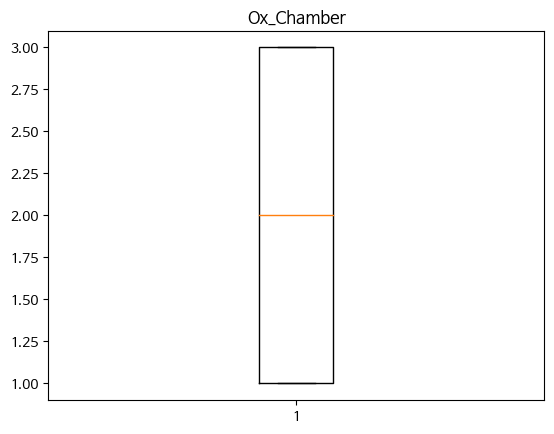

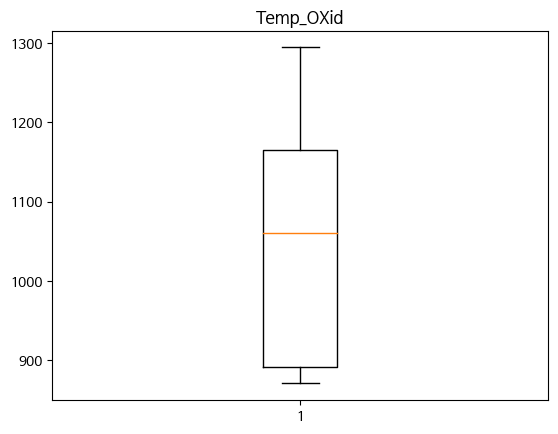

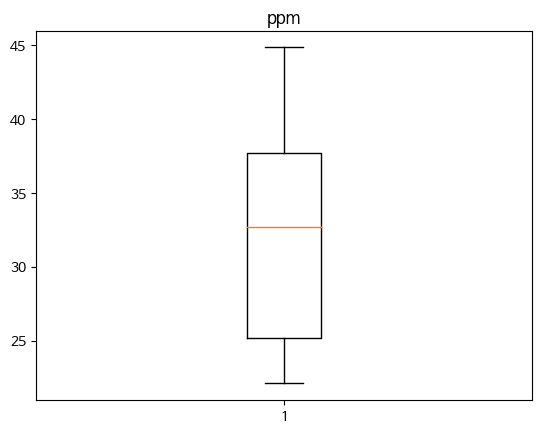

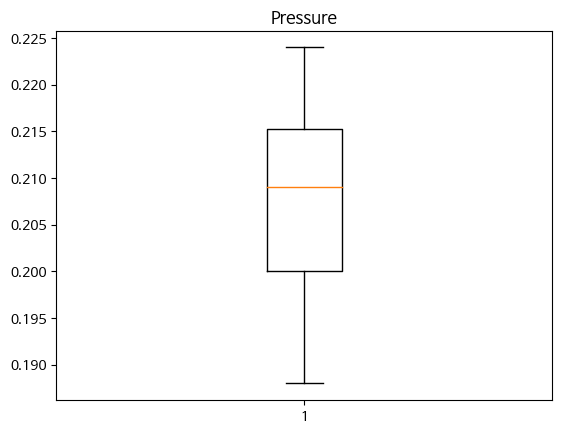

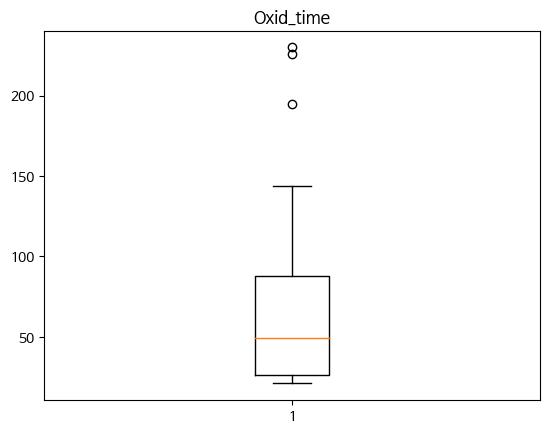

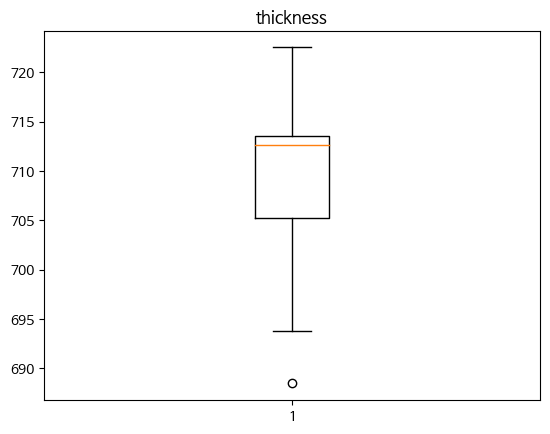

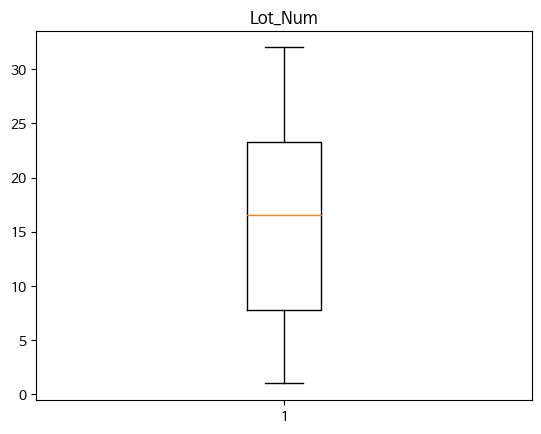

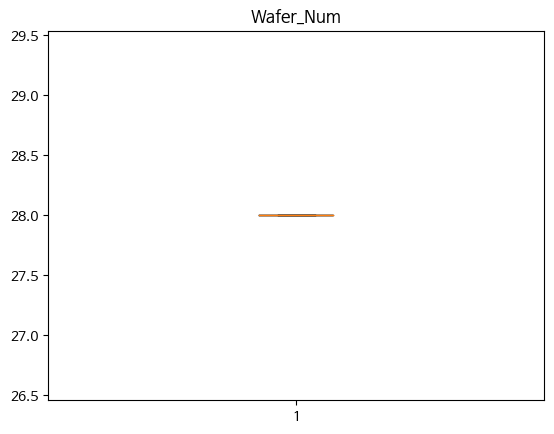

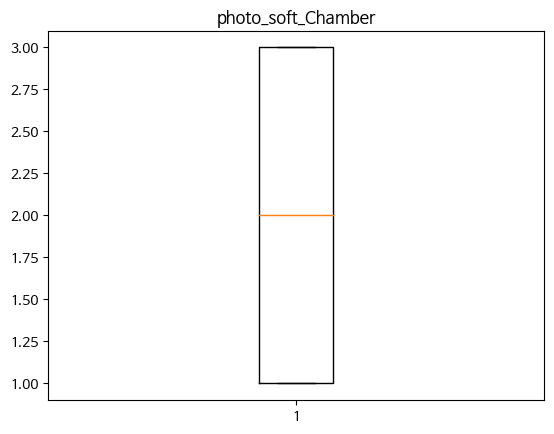

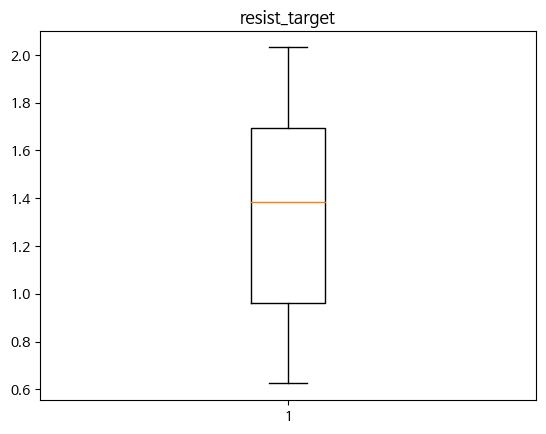

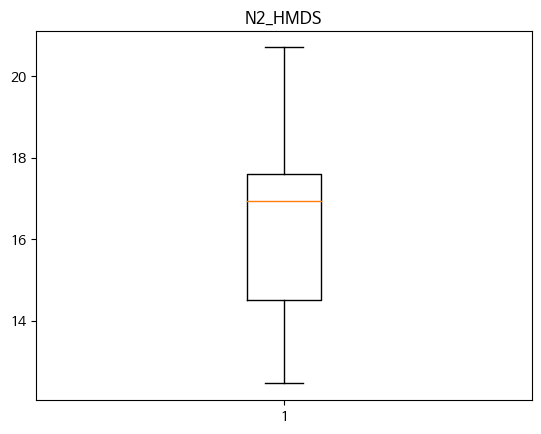

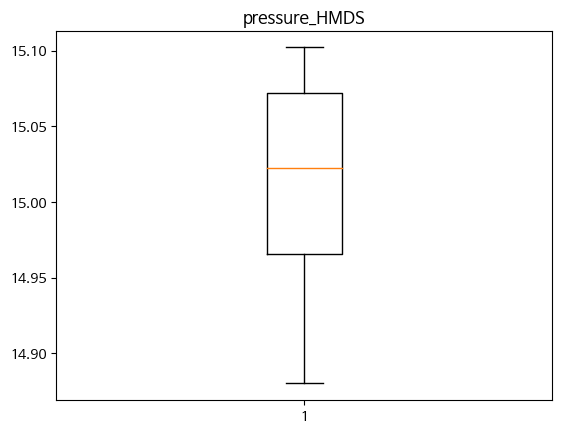

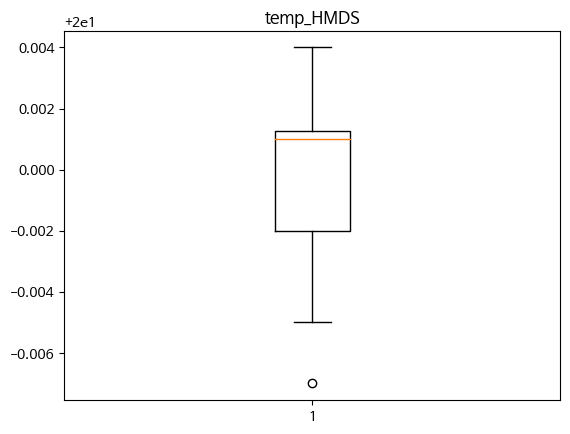

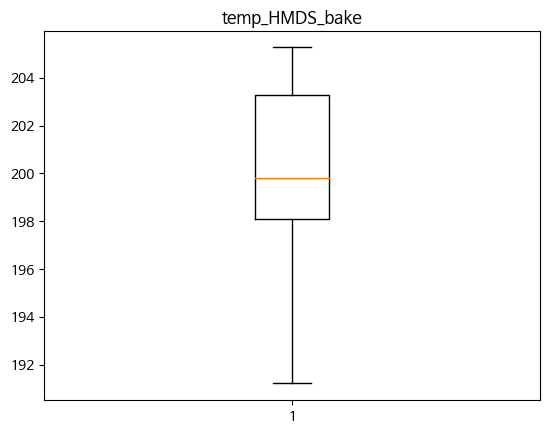

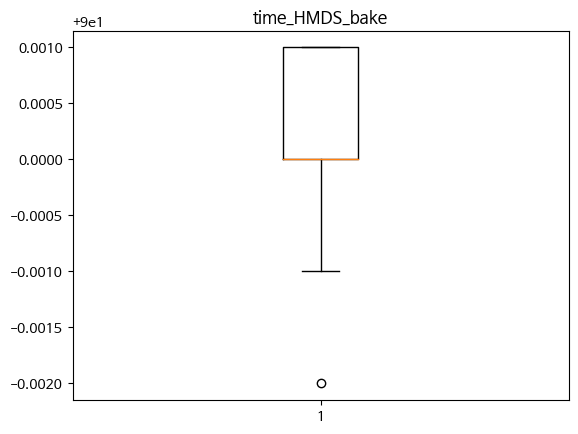

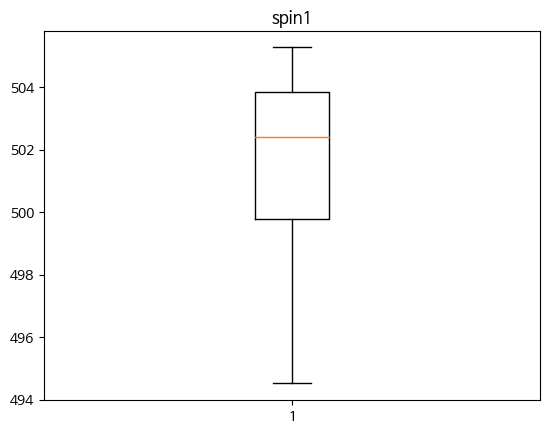

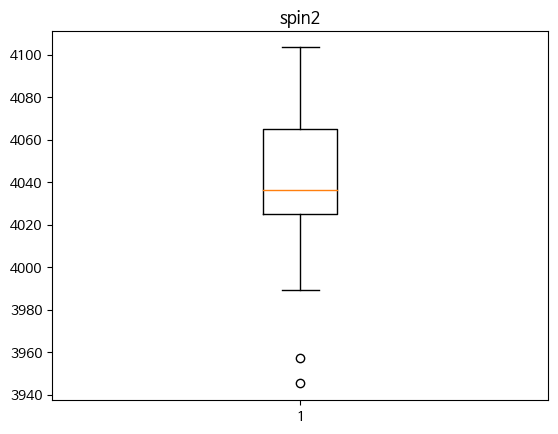

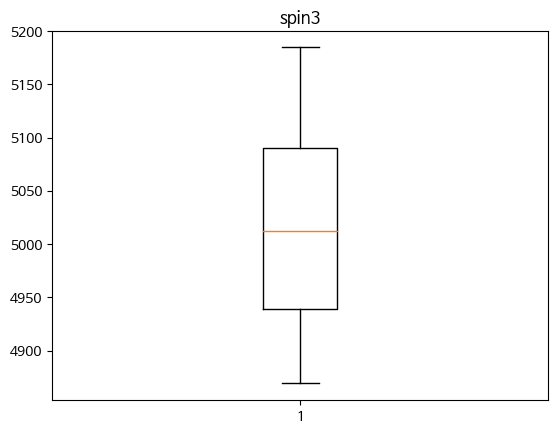

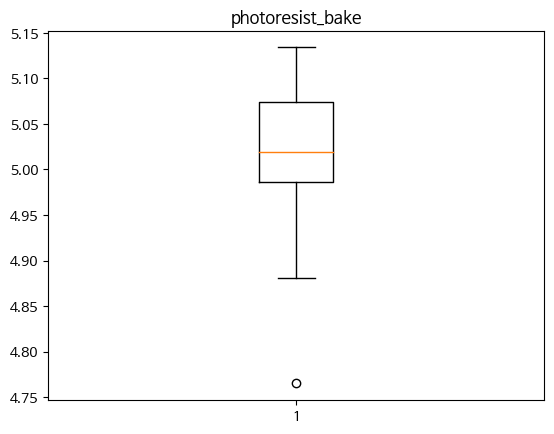

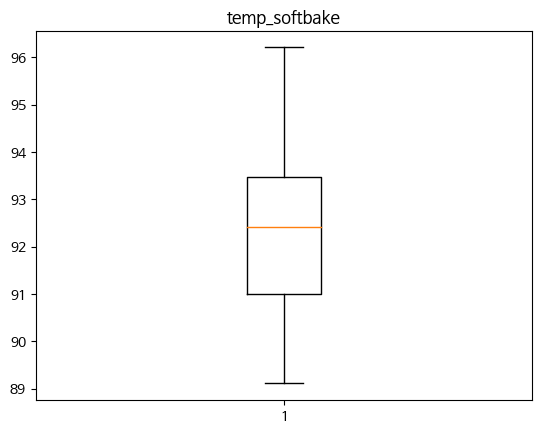

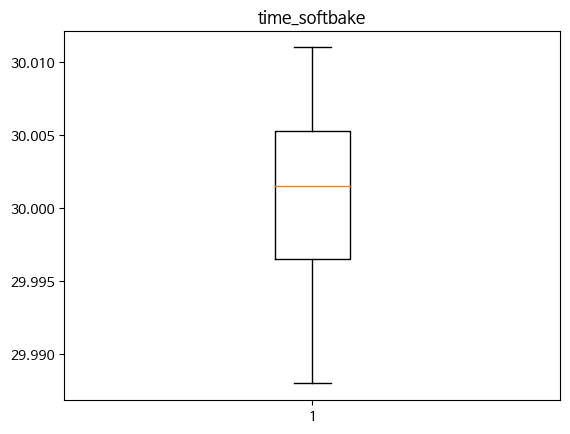

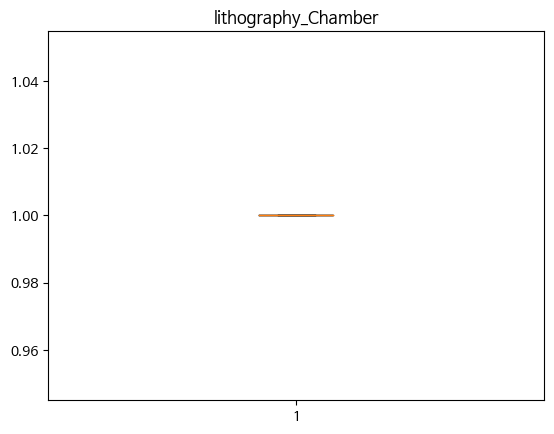

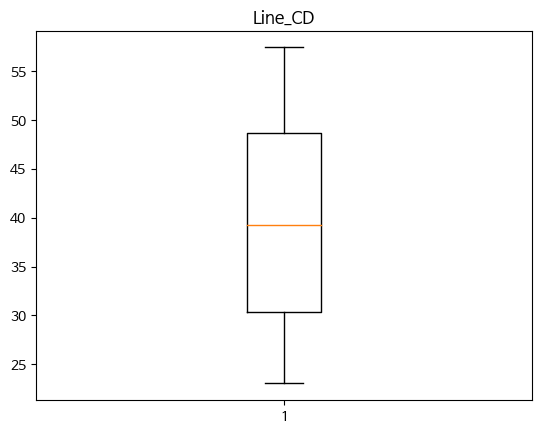

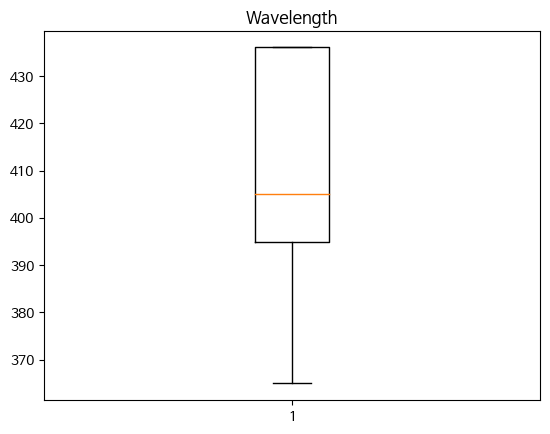

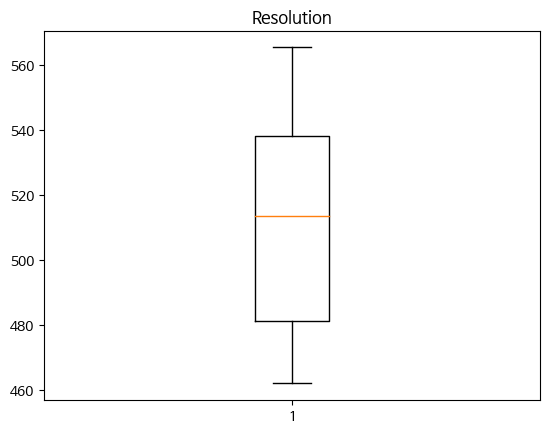

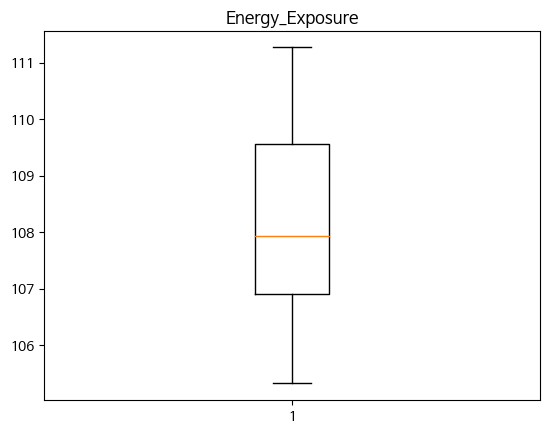

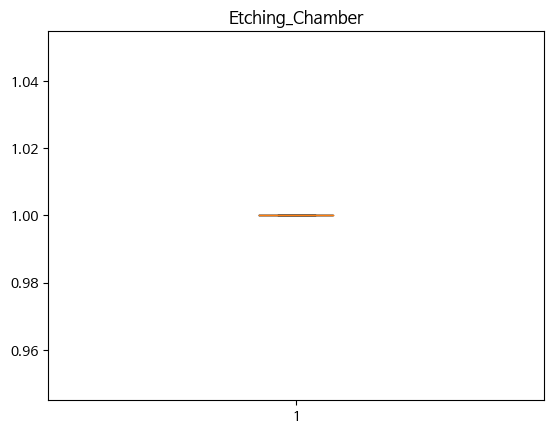

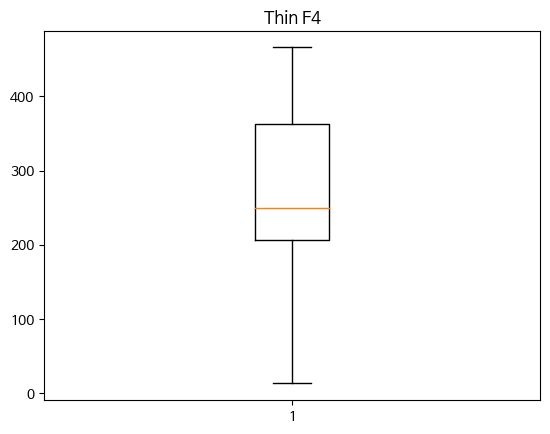

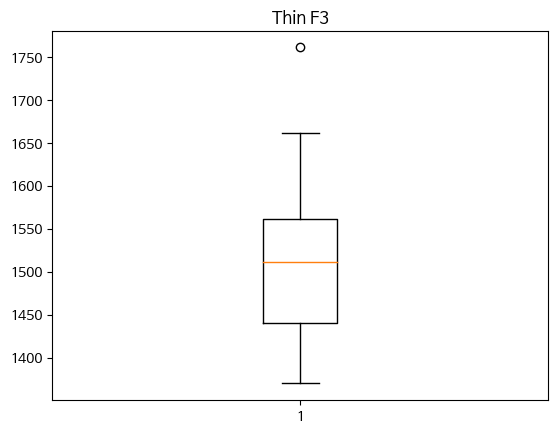

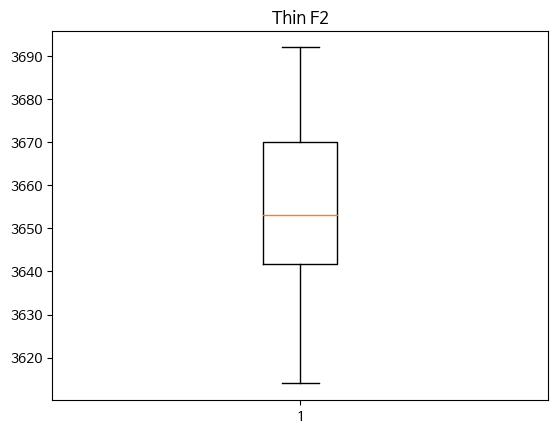

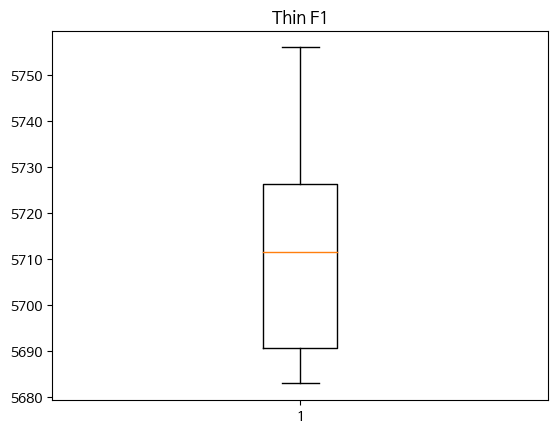

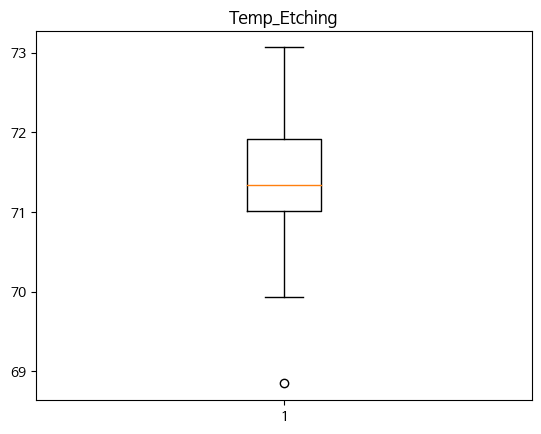

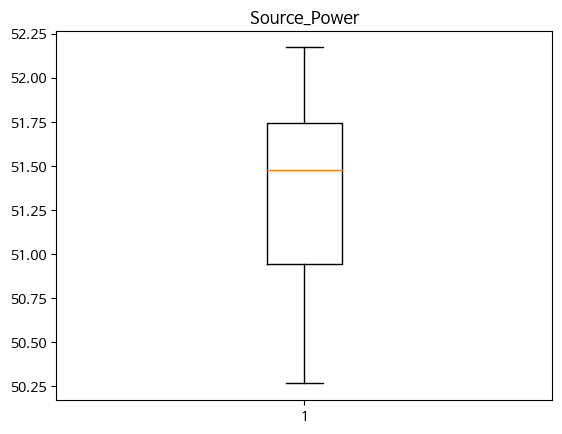

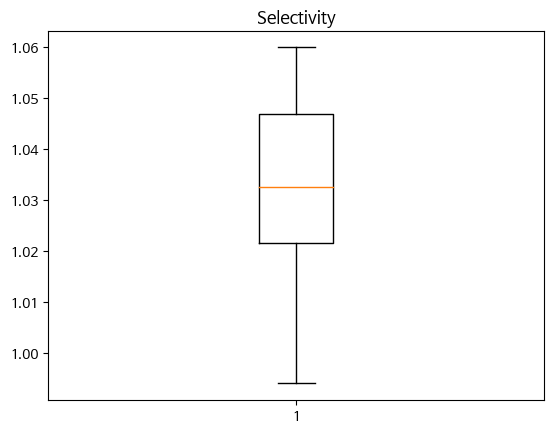

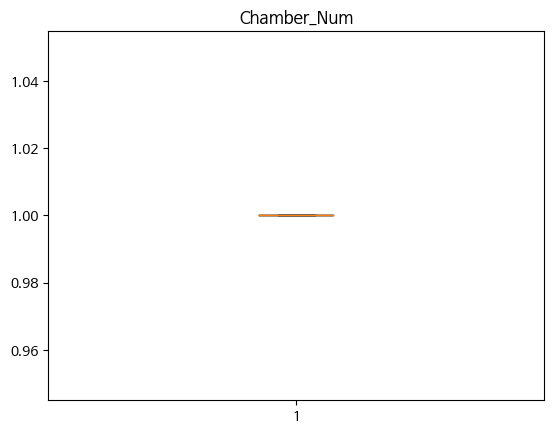

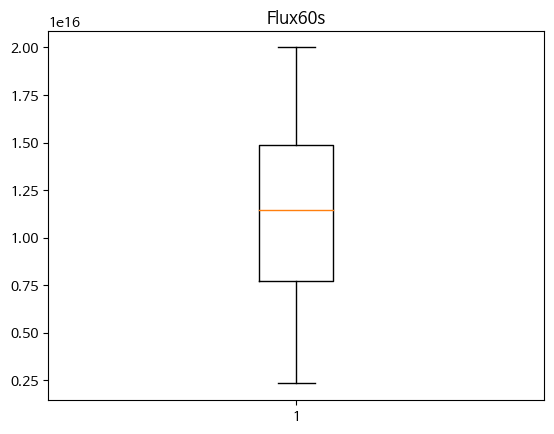

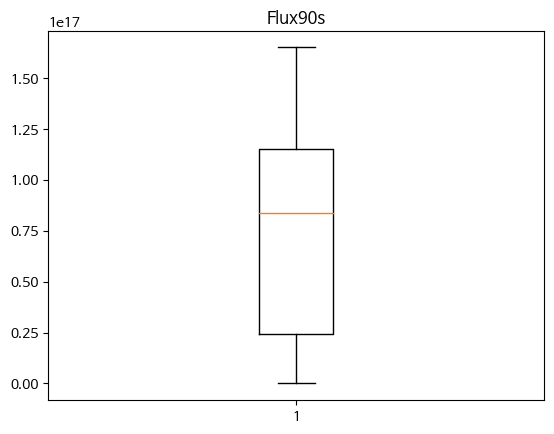

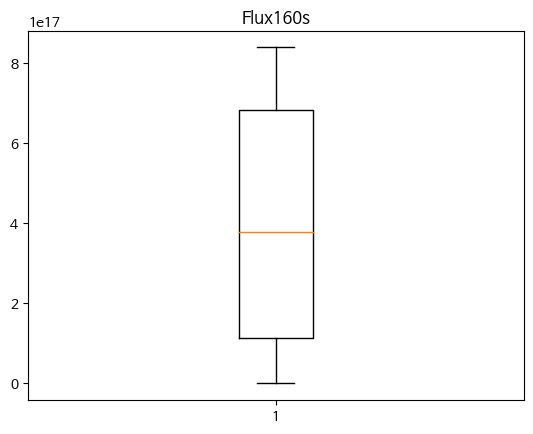

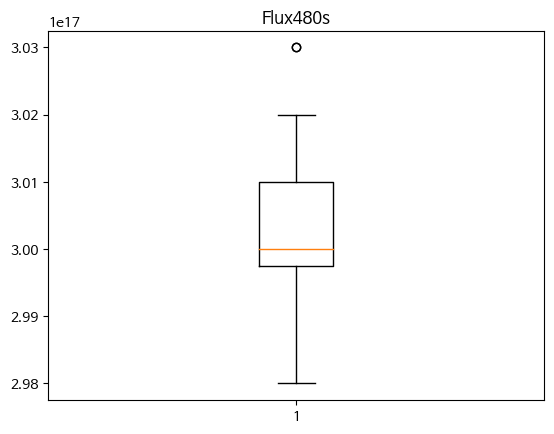

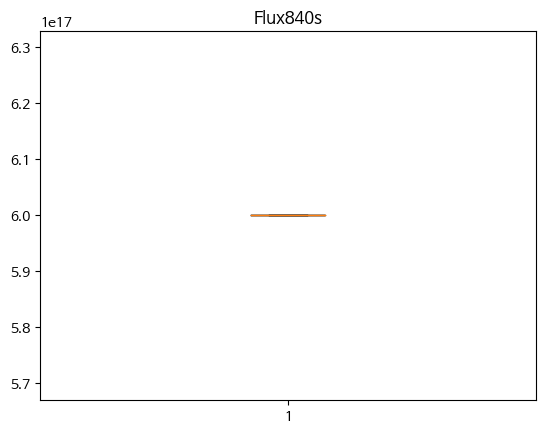

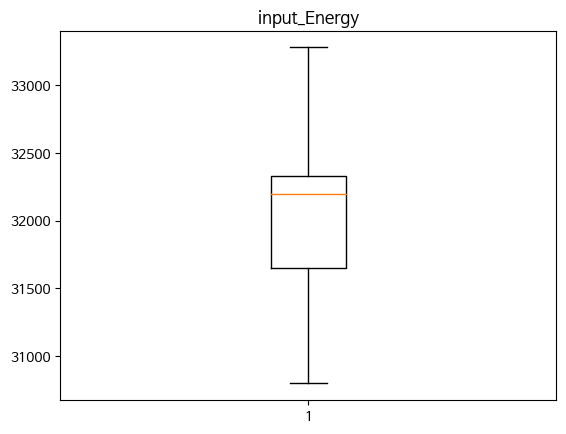

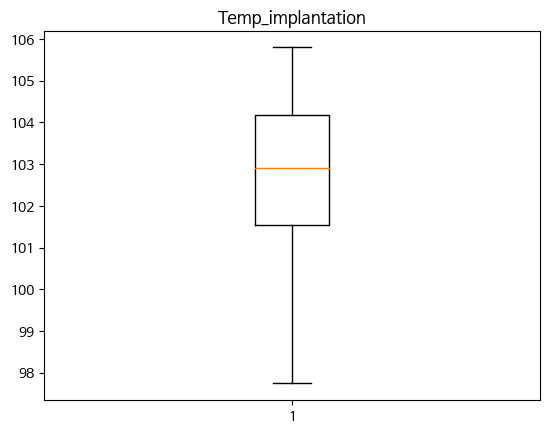

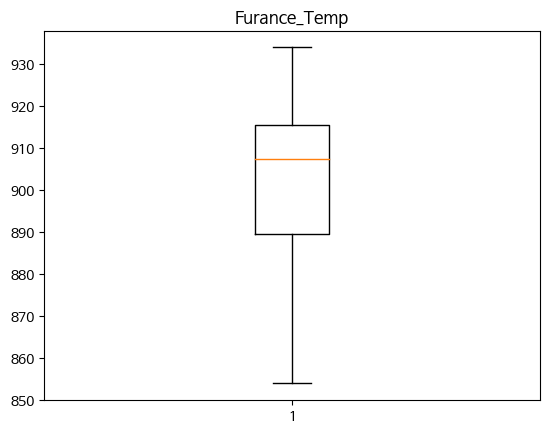

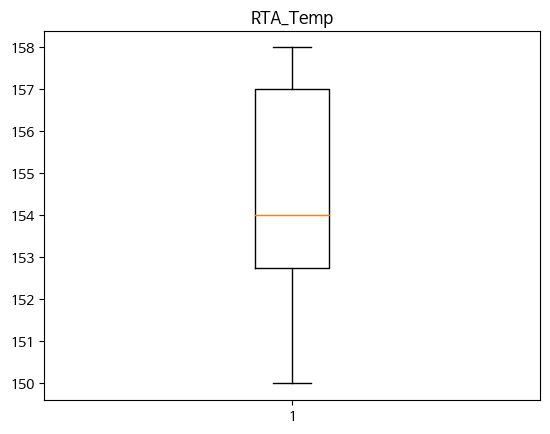

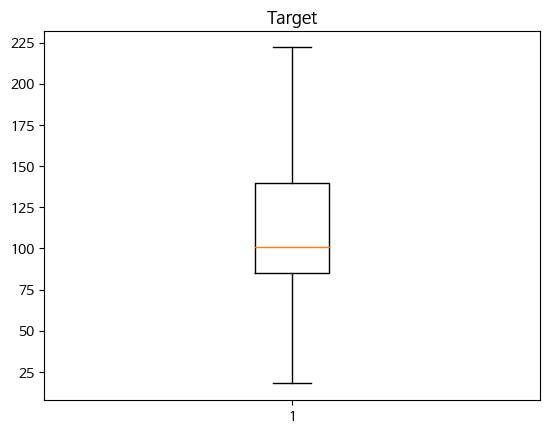

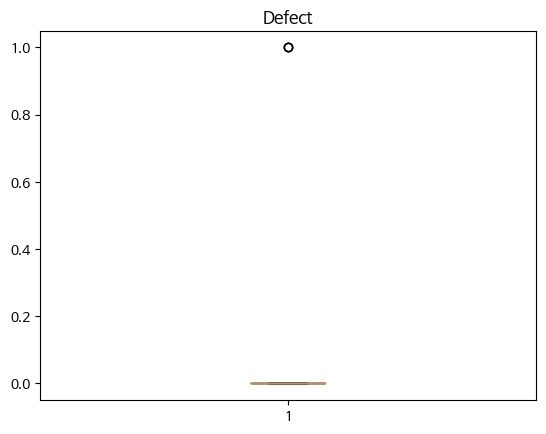

In [48]:
#데이터 속성 확인하기
columns = df.select_dtypes(include=['float64', 'int64']).columns
for c in columns:
    plt.boxplot(df[c])
    plt.title(c)
    plt.show()

#### 히스토그램 확인

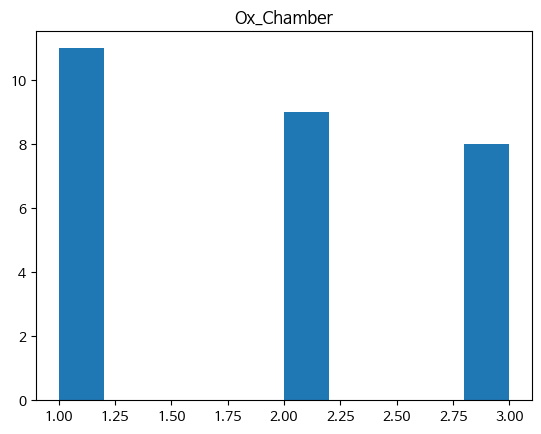

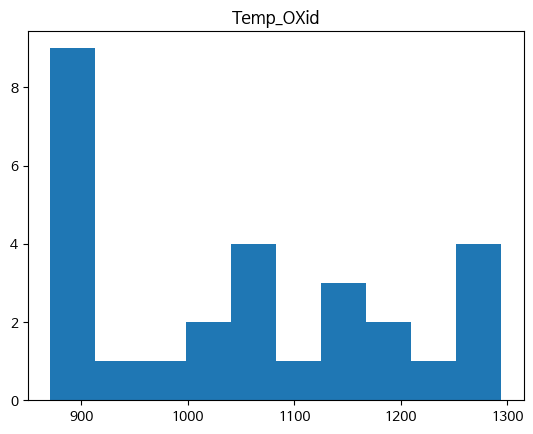

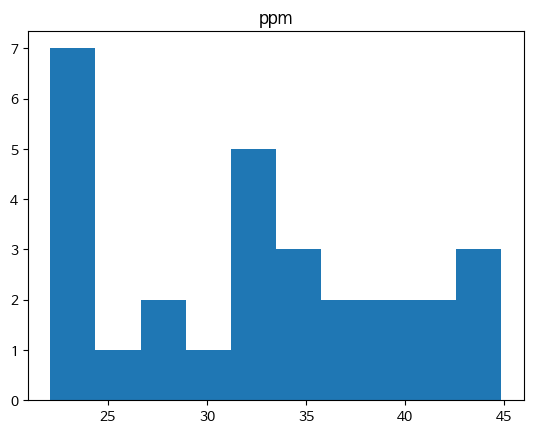

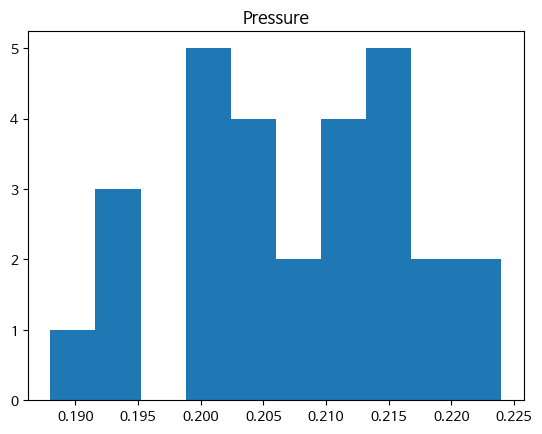

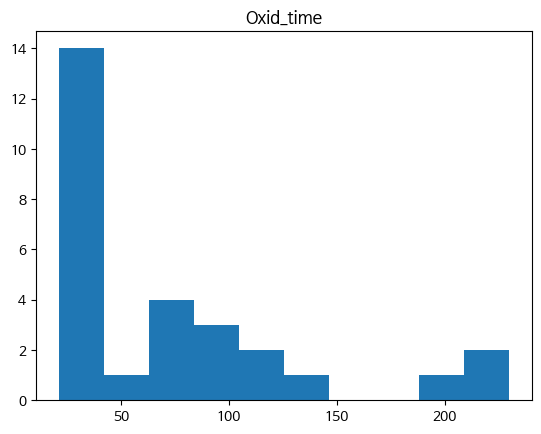

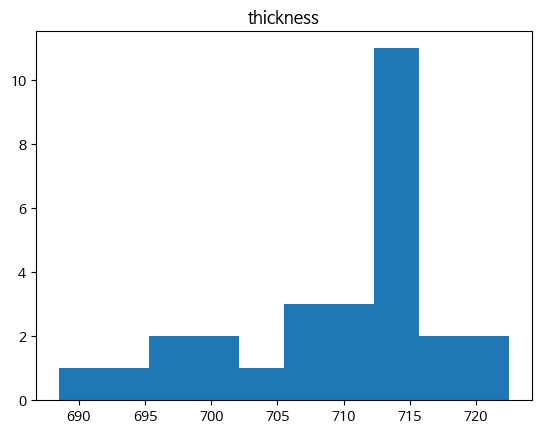

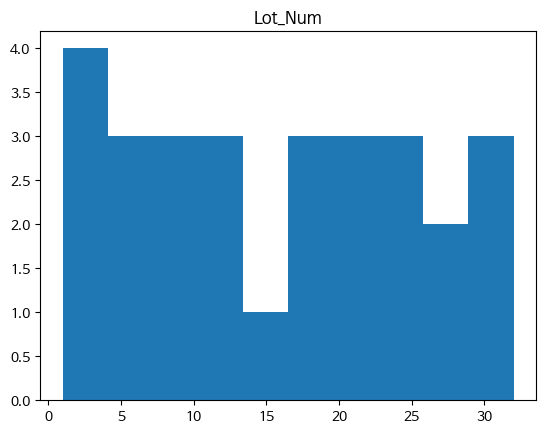

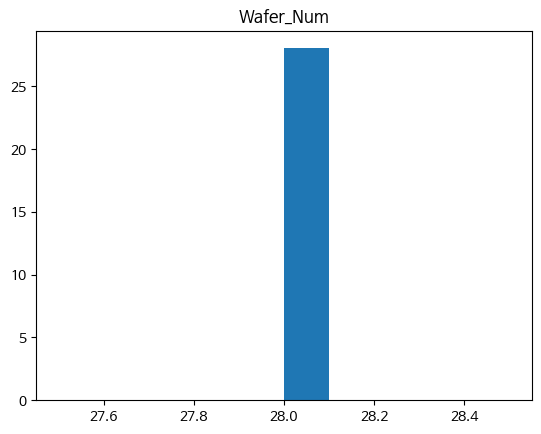

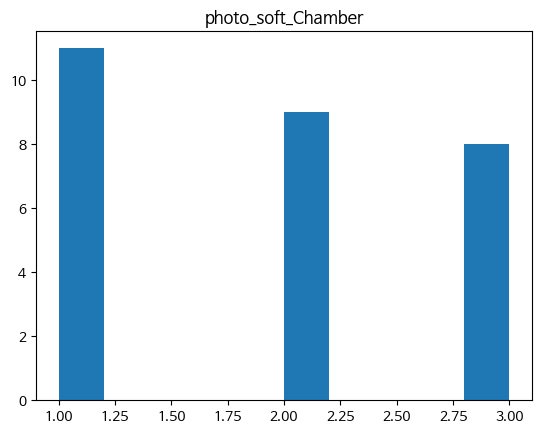

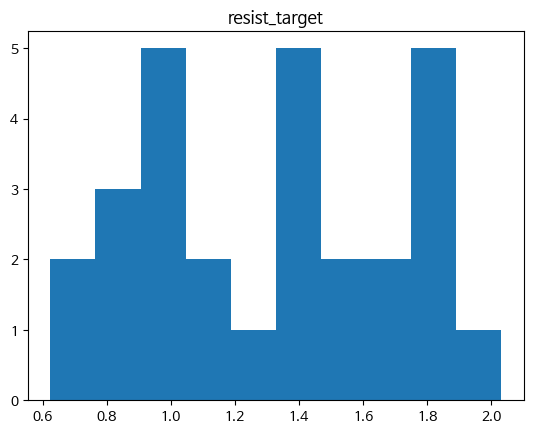

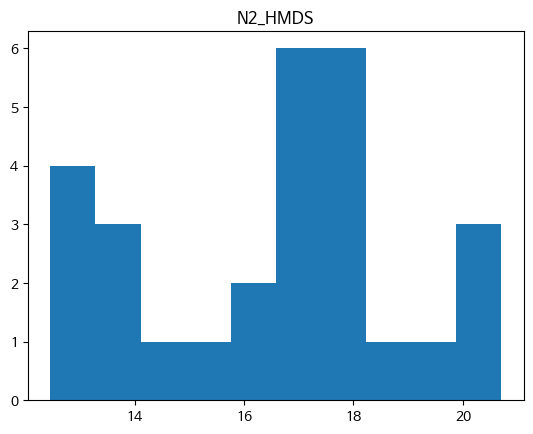

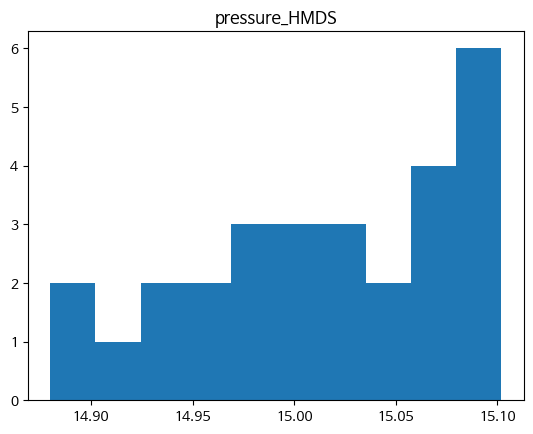

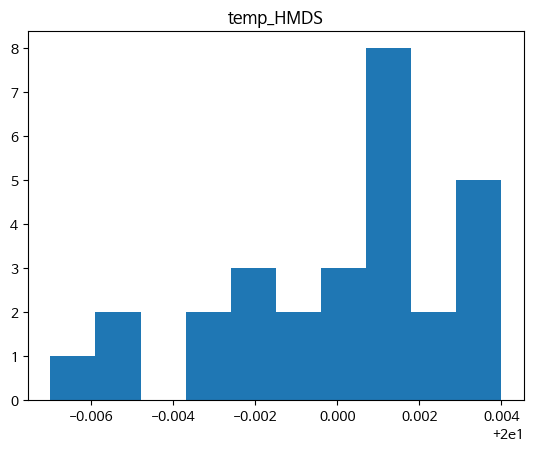

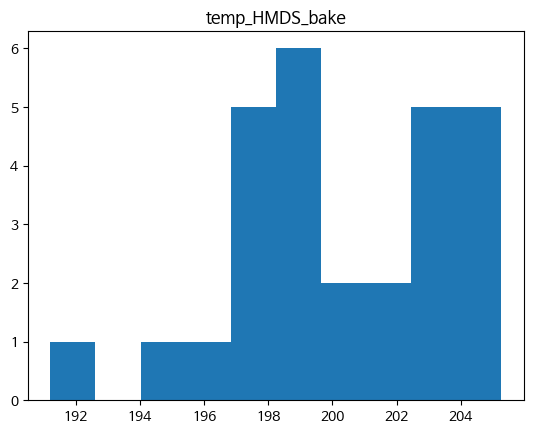

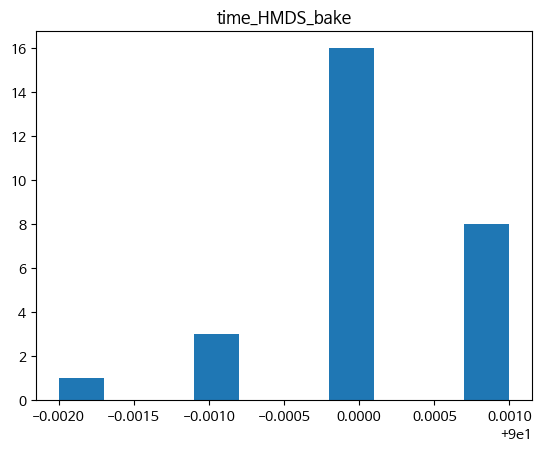

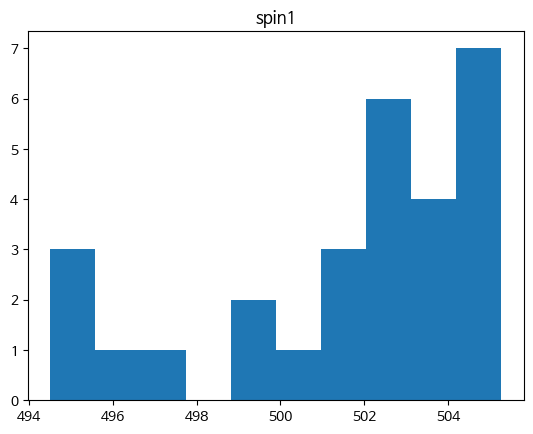

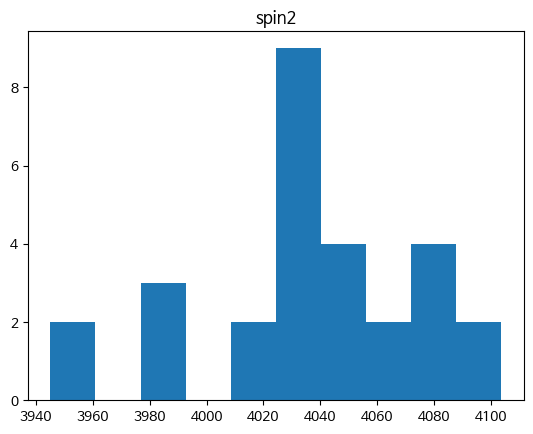

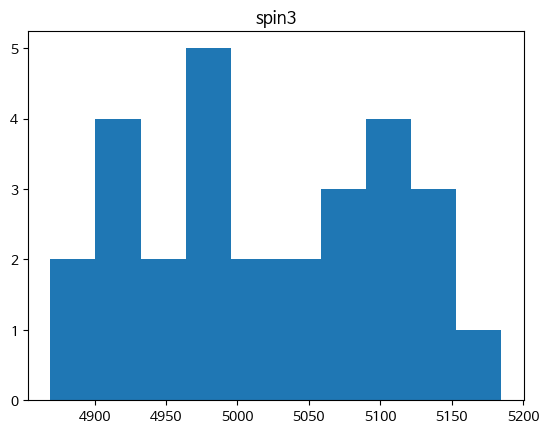

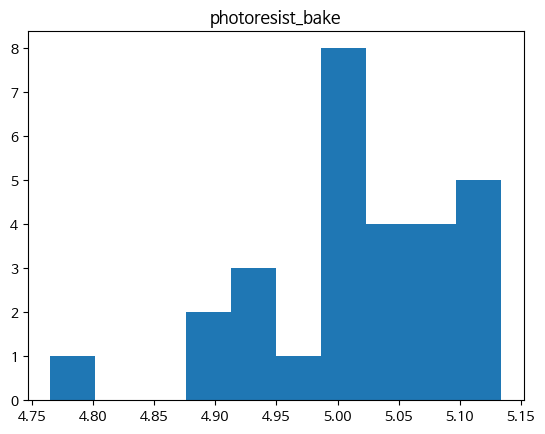

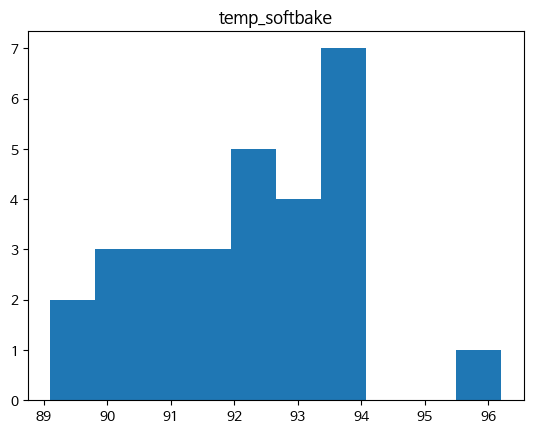

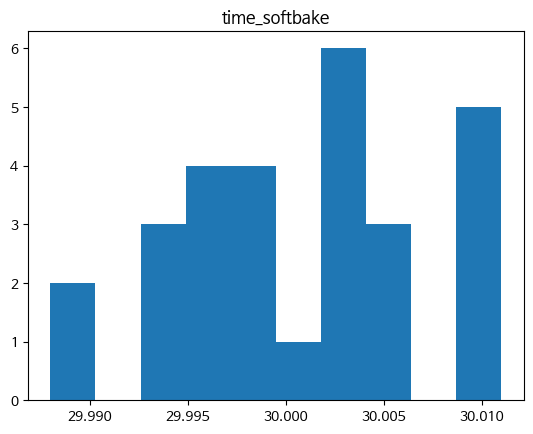

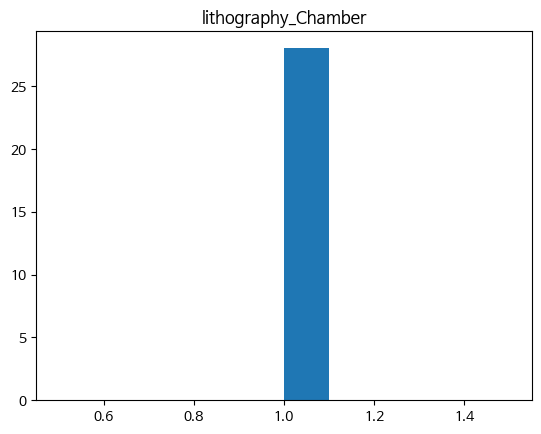

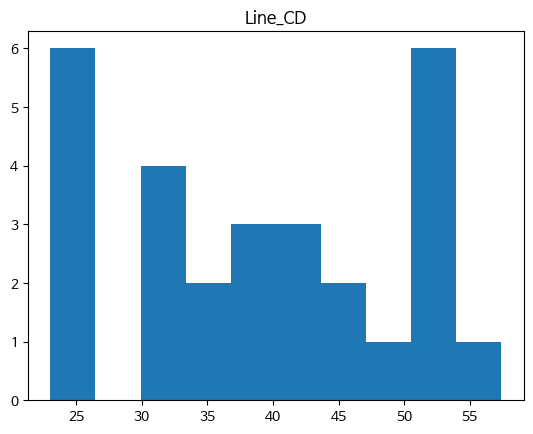

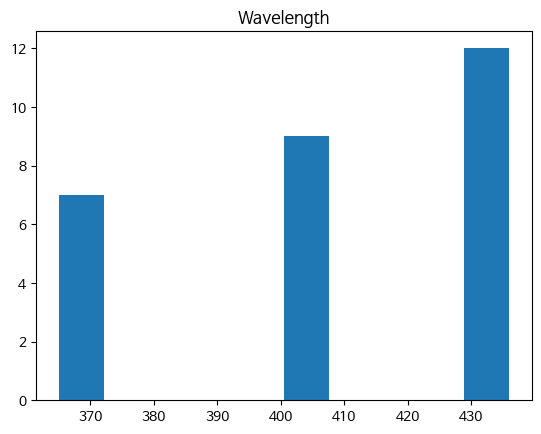

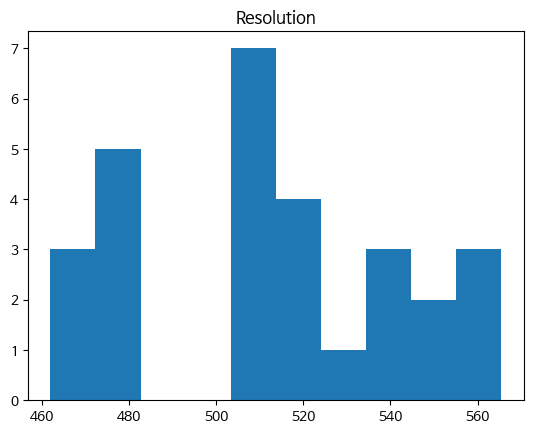

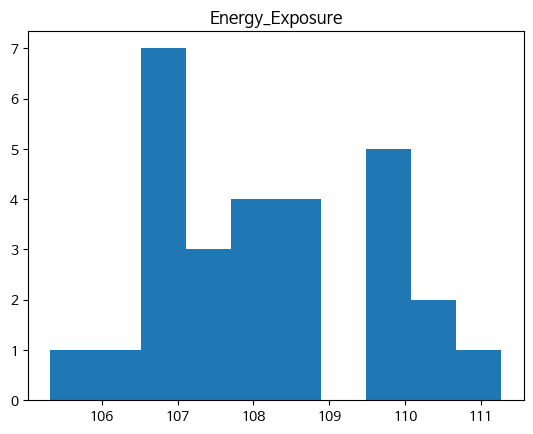

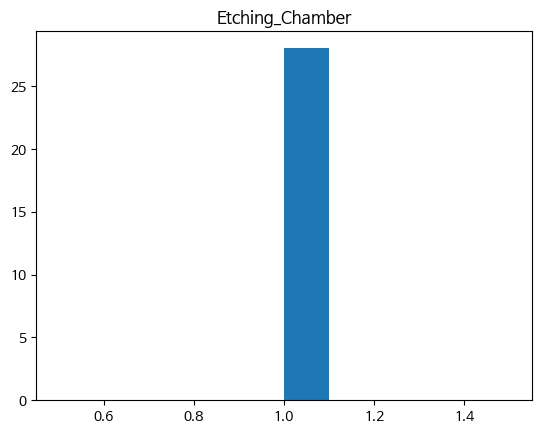

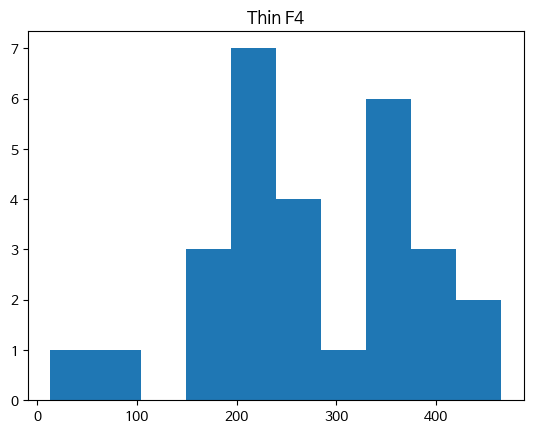

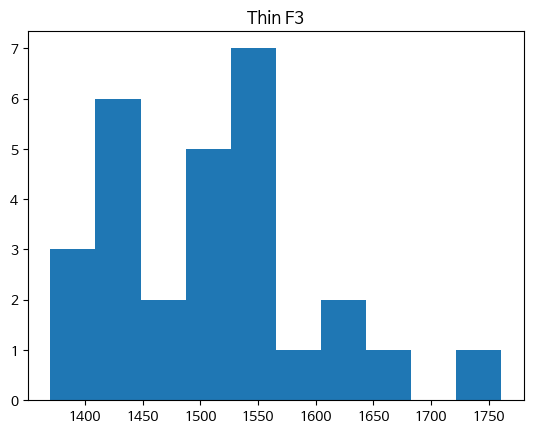

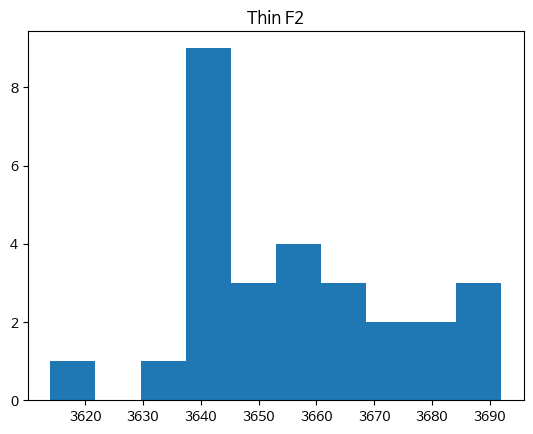

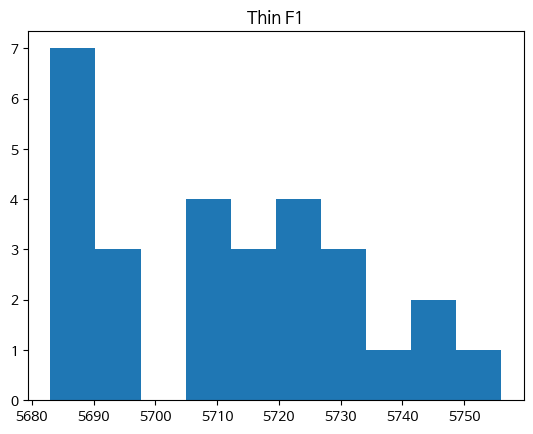

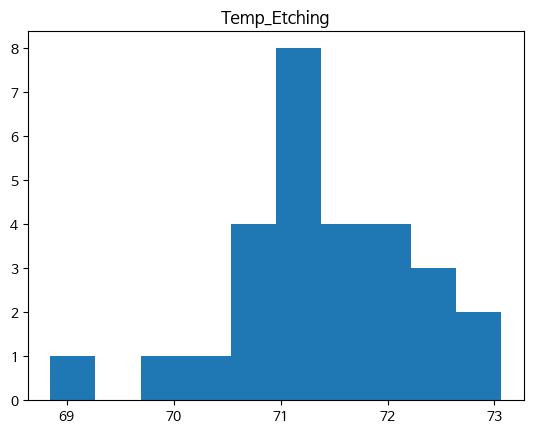

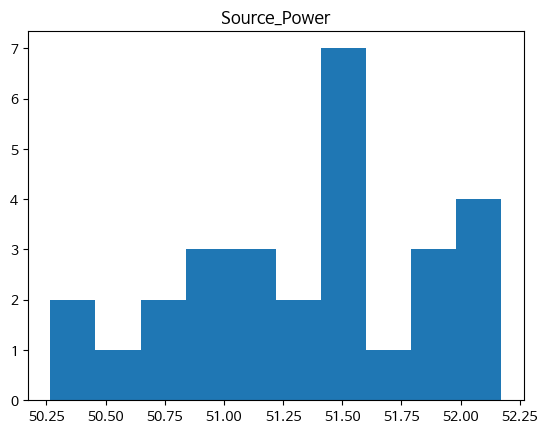

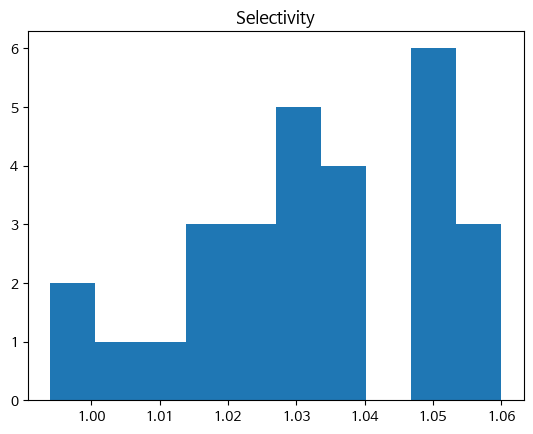

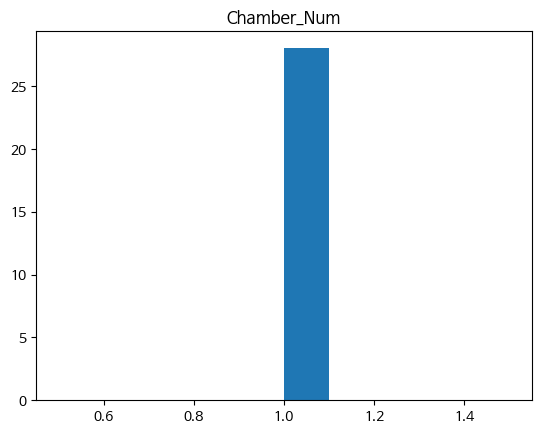

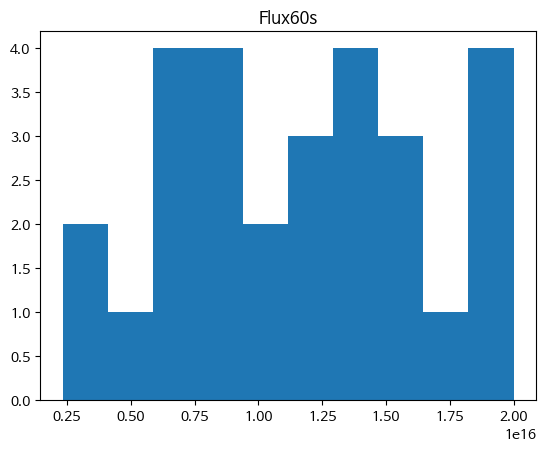

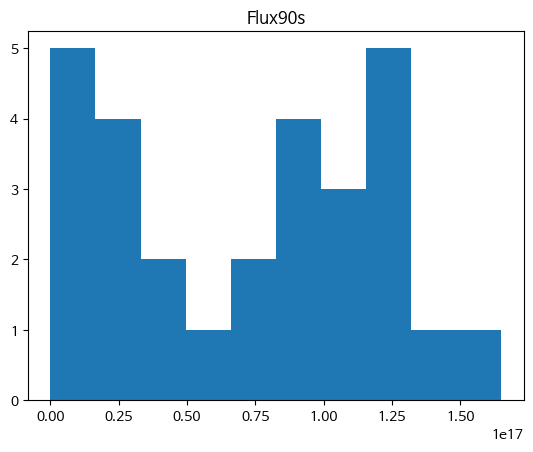

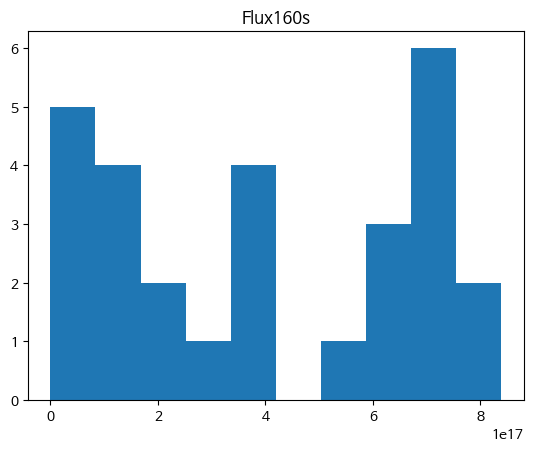

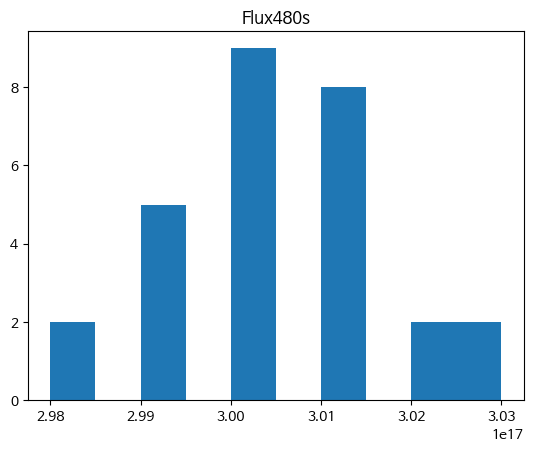

IndexError: index -9223372036854775808 is out of bounds for axis 0 with size 11

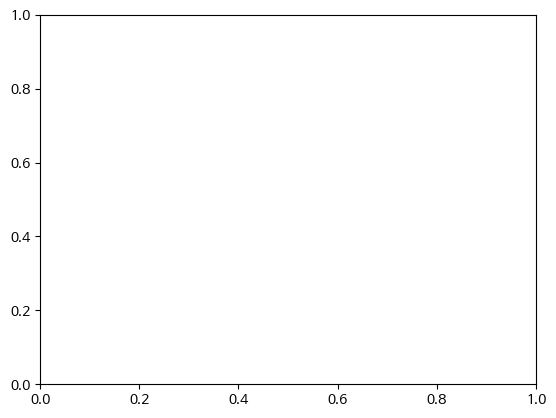

In [49]:
#데이터 속성 확인하기
columns = df.select_dtypes(include=['float64', 'int64']).columns
for c in columns:
    plt.hist(df[c])
    plt.title(c)
    plt.show()

### 관리도 그리기

1. c 관리도 (부적합수 관리도, 결점수 관리도)

  ㅇ 관리도(Control Chart) 중 c 관리도는 검사 개수가 항상 일정한 경우에 사용
  
     - 이는 일정 단위 중에 나타나는 결점의 수를 관리하는데에 적합  
     - 예를들면, 생산제품 1대 중 납땜 불량 개수, 얼룩의 수 등과 같이 일정 단위 중에 포함된 결점의 수를 취급할 때 유용  
  ㅇ 만일, 검사 개수가 일정하지 않을 때에는 u 관리도가 적합

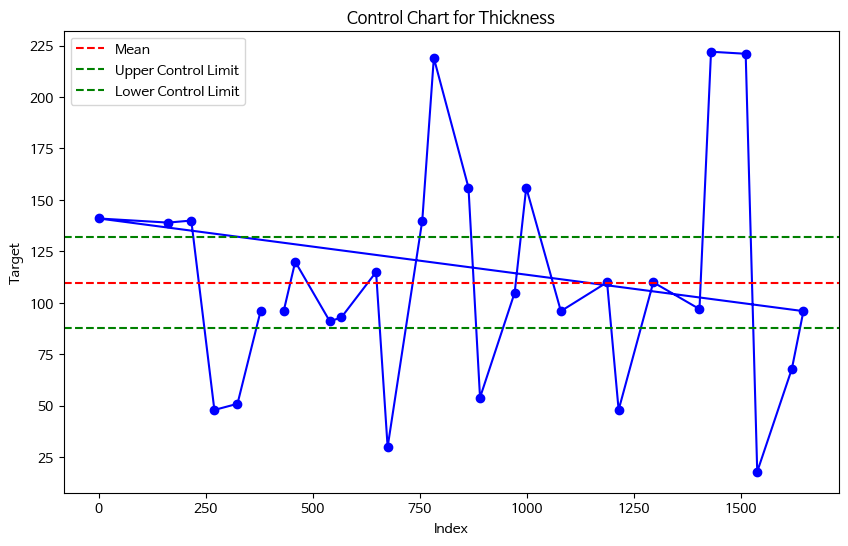

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# Calculate mean and standard deviation for the 'thickness' column
mean = df['Target'].mean()
std = df['Target'].std()

# Set control limits (e.g., 3 standard deviations)
upper_limit = mean + 3 * math.sqrt(std)
lower_limit = mean - 3 * math.sqrt(std)

# Create the control chart
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Target'], marker='o', linestyle='-', color='b')
plt.axhline(mean, color='r', linestyle='--', label='Mean')
plt.axhline(upper_limit, color='g', linestyle='--', label='Upper Control Limit')
plt.axhline(lower_limit, color='g', linestyle='--', label='Lower Control Limit')
plt.xlabel('Index')
plt.ylabel('Target')
plt.title('Control Chart for Thickness')
plt.legend()
plt.show()

In [ ]:
exceeding_points = df[df['Target'] > upper_limit]
num_exceeding_points = len(exceeding_points)

print(f"상한선 이상 데이터 개수: {num_exceeding_points}")


In [ ]:
upper_limit

In [ ]:
print(mean)
print(math.sqrt(mean))